<a href="https://colab.research.google.com/github/jinzus/DIVULGAZIONE-YOU-TUBE/blob/main/FIORE_AUREO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

L'algoritmo permette di rappresentare una sezione aurea bypassando i problemi di codominio della circonferenza grazie al cambiamento di base e all'equazione differenziale deterministica per gli spostamenti dei centri.

In [1]:
# Import dependencies
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Fibonacci=[0,1]  # inizializziamo di primi due termini della successione
for indice in range(1,40):   # per i successivi ragioniamo in modo ricorsivo
  Fibonacci.append(Fibonacci[indice]+Fibonacci[indice-1])

Fibonacci=Fibonacci[2:]   # bypassiamo i primi due termini
Delta=np.empty((len(Fibonacci),2))   # creiamo una matrice vuota per i delta
Delta[0]=[0,1]   # inseriamo manualmente il primo termine 
for item in range(1,len(Delta)):   # per i termini successivi...
  if item%2==0:   # ...se divisibili per 2
    Delta[item]=np.array([0,Fibonacci[item-1]])   # hanno ordinata non nulla
  else:   #...altrimenti
    Delta[item]=np.array([Fibonacci[item-1],0])  # hanno ascissa non nulla

Centri=np.empty((len(Fibonacci)+1,2))   # creiamo una matrice vuota per i centri e inseriamo manualmente i primi due centri
Centri[0]=[0,0]
Centri[1]=[0,-1]
# NOTA IMPORTANTE: nel pratico il centro di arrivo è una incognita, per cui non è possibile implementare l'algoritmo come 
# presentato nella teoria; è necessario ragionare in termini di localizzazione del centro predente...
for item in range(2,len(Centri)):
  if Centri[item-1,0]>0 and Centri[item-1,1]>0:   # Primo quadrante
    Centri[item]=Centri[item-1]-Delta[item-1]
  if Centri[item-1,0]<0 and Centri[item-1,1]>0:   # Secondo quadrante
    Centri[item]=Centri[item-1]-Delta[item-1]
  if Centri[item-1,0]<=0 and Centri[item-1,1]<0:   # Terzo quadrante, con l'uguaglianza posso non inizializzare il centro 2
    Centri[item]=Centri[item-1]+Delta[item-1]
  if Centri[item-1,0]>0 and Centri[item-1,1]<0:   # Quarto quadrante
    Centri[item]=Centri[item-1]+Delta[item-1]


Text(0.5, 1.0, 'Arco ruotato di 90 gradi')

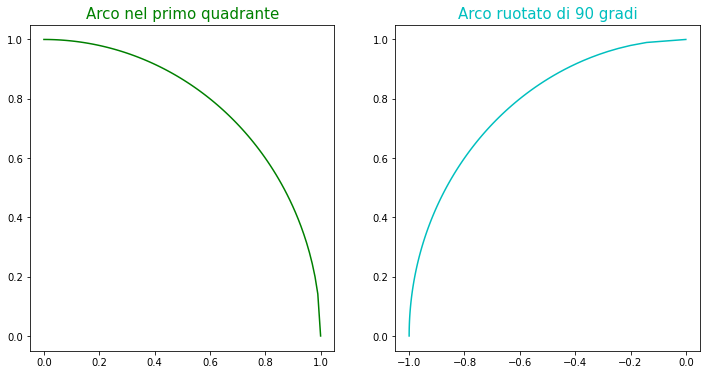

In [3]:
# ESEMPIO DI APPLICAZIONE ROTATIVA

def applicazione_rotativa(matrice,theta):   # definiamo l'applicazione lineare rotativa
  matrice_rotativa=np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
  return np.dot(matrice,matrice_rotativa)
risoluzione=100   # questo serve per avere un bell'arco di circonferenza continuo
x=np.linspace(0,Fibonacci[0],risoluzione)
y=np.sqrt(Fibonacci[0]**2-x**2)
arco=np.stack((x,y),axis=-1)
arco_ruotato=applicazione_rotativa(arco,-np.pi/2)
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(arco[:,0],arco[:,1],'g')
plt.title("Arco nel primo quadrante",fontsize=15,color='g')
plt.subplot(122)
plt.plot(arco_ruotato[:,0],arco_ruotato[:,1],'c')
plt.title("Arco ruotato di 90 gradi",fontsize=15,color='c')

(-79166397.75000022, 33401172.75000474, -128093923.05, 54044232.05)

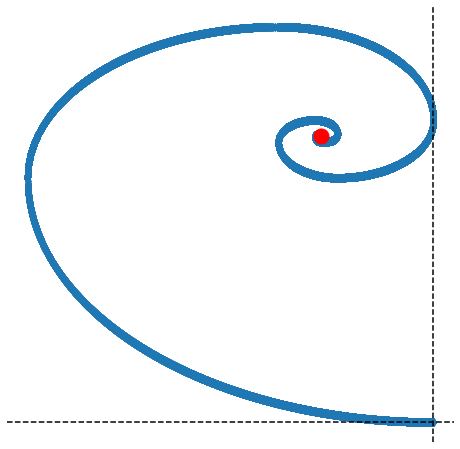

In [4]:
# Rappresentiamo la spirale corrispondente ai primi N-1 archi.
risoluzione=10000
angolo=0
# Creiamo un tensore vuoto di rango 3: la prima dimensione colleziona il numero di archi e le altre due i singoli 
# archi in  x e y
Collezione_archi=np.empty((len(Fibonacci),risoluzione,2))
for indice in range(len(Fibonacci)):
  x=np.linspace(0,Fibonacci[indice],risoluzione)
  y=np.sqrt(Fibonacci[indice]**2-x**2)   # Risoluzione per y di una circonferenza centrata nell'origine con r in Fibonacci 
  arco=np.stack((x,y),axis=-1)  # matrice contenente l'arco attuale 
  arco_ruotato=applicazione_rotativa(arco,angolo)   # Ruotiamo la matrice
  arco_ruotato_decentrato=arco_ruotato+Centri[indice]    # Centriamo la matrice
  Collezione_archi[indice]=arco_ruotato_decentrato   # Inseriamo il singolo arco nel tensore contenente tutti gli archi
  angolo-=np.pi/2   # Ruotiamo a multipli di 90°

# Moltiplichiamo le prime due dimensioni del tensore per potere rappresentare graficamente un matrice contenente
# tutti gli archi, ruotati e centrati.
Collezione_archi=Collezione_archi.reshape(np.product(Collezione_archi.shape[:2]),-1)
plt.figure(figsize=(8,8))
plt.plot(Collezione_archi[:,0],Collezione_archi[:,1],"d")
origine=Collezione_archi[-risoluzione]
plt.axhline(origine[1],color='k',linestyle='--')
plt.axvline(origine[0],color='k',linestyle='--')
plt.plot(0,0,'ro',markersize=15)
plt.axis('off')


  


(-107450862.75000471, 5116707.750000224, -8279007.050000001, 173859148.05)

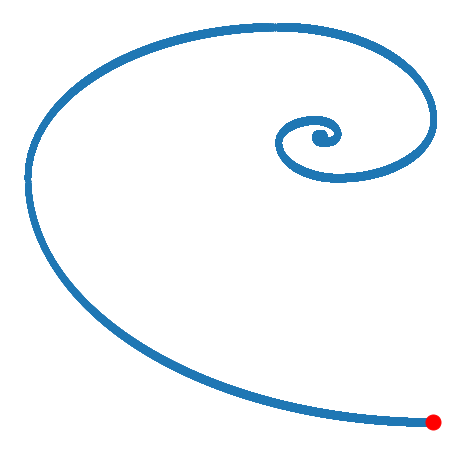

In [5]:
plt.figure(figsize=(8,8))
plt.plot(Collezione_archi[:,0]-origine[0],Collezione_archi[:,1]-origine[1],"d")
plt.plot(0,0,'ro',markersize=15)
plt.axis('off')

In [6]:
spiraliRuotate=np.c_[Collezione_archi[:,0]-origine[0],Collezione_archi[:,1]-origine[1]]
angolo=-np.pi
for _ in range(4):
  spiraliRuotate=np.concatenate((spiraliRuotate,applicazione_rotativa(spiraliRuotate[:len(Collezione_archi)],angolo)),axis=0)
  angolo-=np.pi/2

In [7]:
def plotFlower(data,colore_marker='gd',backCol='ws',center=None,font=6,title=True,save=False):
  data=(data-data.min(axis=0))/(data.max(axis=0)-data.min(axis=0))
  np.random.seed(23)
  sfondo=np.random.rand(10000,2)
  plt.figure(figsize=2*[font])
  if title:
    plt.title("$Fiore$ $aureo$",color='b',fontsize=25,pad=20)
  plt.plot(sfondo[:,0],sfondo[:,1],backCol,ms=50)
  plt.plot(data[:,0],data[:,1],colore_marker)
  plt.plot(data[:,1],data[:,0],colore_marker)
  if center is not None:
    plt.plot(data[-risoluzione,0],data[-risoluzione,1],center,ms=12)
  plt.axis([-.08,1.08,-.08,1.08])
  plt.axis('off')

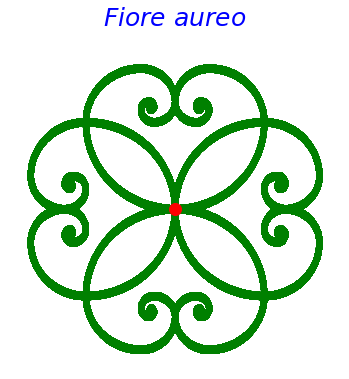

In [8]:
plotFlower(spiraliRuotate,center='ro')